In [1]:
import pandas as pd

In [ ]:
#Ucitavanje fajlova
results_df = pd.read_csv("../../data/skin_tones.csv")
cleaned_df = pd.read_csv("../../ocisceni_podaci.csv")

In [ ]:
# Uklanjamo .jpg iz kolone 'file'
results_df['file_clean'] = results_df['file'].str.replace('.jpg', '', regex=False)

In [4]:
#provera
results_df.head(1)

,file,image type,face id,dominant 1,percent 1,dominant 2,percent 2,skin tone,tone label,accuracy(0-100),file_clean
0,ISIC_0015719.jpg,color,NaN,#E2AF8E,0.75,#BF8761,0.25,#D7BD96,CE,88.81,ISIC_0015719


In [5]:
# Spojamo kolonu skin tone sa odgovarajucom slikom u ocisceni_podaci.csv: image_name == file_clean
merged_df = cleaned_df.merge(results_df[['file_clean', 'skin tone']],
                                      left_on='image_name',
                                      right_on='file_clean',
                                      how='left')

In [6]:
# Uklonjamo pomoćnu kolonu
merged_df.drop(columns=['file_clean'], inplace=True)

In [9]:
#provera
merged_df.head(10)

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target,skin tone
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0,#F3E7DB
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0,#D7BD96
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0,#604134
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0,#604134
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0,#D7BD96
5,ISIC_0074311,IP_2950485,female,40.0,lower extremity,unknown,benign,0,#F3E7DB
6,ISIC_0074542,IP_4698288,male,25.0,lower extremity,unknown,benign,0,#F3E7DB
7,ISIC_0075663,IP_6017204,female,35.0,torso,unknown,benign,0,#D7BD96
8,ISIC_0075914,IP_7622888,male,30.0,torso,unknown,benign,0,#F3E7DB
9,ISIC_0076262,IP_5075533,female,50.0,lower extremity,unknown,benign,0,#F3E7DB


In [10]:
merged_df.to_csv("ocisceni_podaci_sa_tonom_koze.csv", index=False)

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_skin_tone_distribution(csv_file):
    # Učitavanje CSV fajla
    # Definišemo nazive kolona na osnovu primera
    column_names = ['image_id', 'patient_id', 'gender', 'age', 'body_site', 
                   'diagnosis_confirmation_type', 'diagnosis', 'melanoma', 'skin_tone']
    
    # Čitanje CSV fajla
    df = pd.read_csv(csv_file, names=column_names)
    df = df[df['melanoma']=='1']
    # Grupisanje podataka po vrednosti boje kože
    skin_tone_counts = df['skin_tone'].value_counts().sort_index()
    
    # Kreiranje grafa
    plt.figure(figsize=(12, 6))
    
    # Kreiramo bar plot gde je svaki bar obojen odgovarajućom bojom
    bars = plt.bar(range(len(skin_tone_counts)), skin_tone_counts.values)
    
    # Postavljanje boje svakog bara prema heksadecimalnoj vrednosti
    for i, (hex_color, count) in enumerate(skin_tone_counts.items()):
        bars[i].set_color(hex_color)
        # Dodajemo tekst sa brojem podataka i heks kodom
        plt.text(i, count + 0.5, f"{count}\n{hex_color}", 
                 ha='center', va='bottom', fontsize=8)
    
    # Podešavanje ose x da prikazuje heksadecimalne kodove
    plt.xticks(range(len(skin_tone_counts)), skin_tone_counts.index, rotation=45)
    
    # Dodavanje naslova i oznaka osa
    plt.title('Distribucija podataka po boji kože')
    plt.xlabel('Heksadecimalni kod boje kože')
    plt.ylabel('Broj uzoraka')
    
    plt.tight_layout()
    plt.show()
    
    # Dodatno, možemo prikazati i pie chart za vizuelni prikaz proporcija
    plt.figure(figsize=(10, 8))
    plt.pie(skin_tone_counts.values, labels=skin_tone_counts.index, 
            colors=skin_tone_counts.index, autopct='%1.1f%%')
    plt.title('Proporcije podataka po boji kože')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

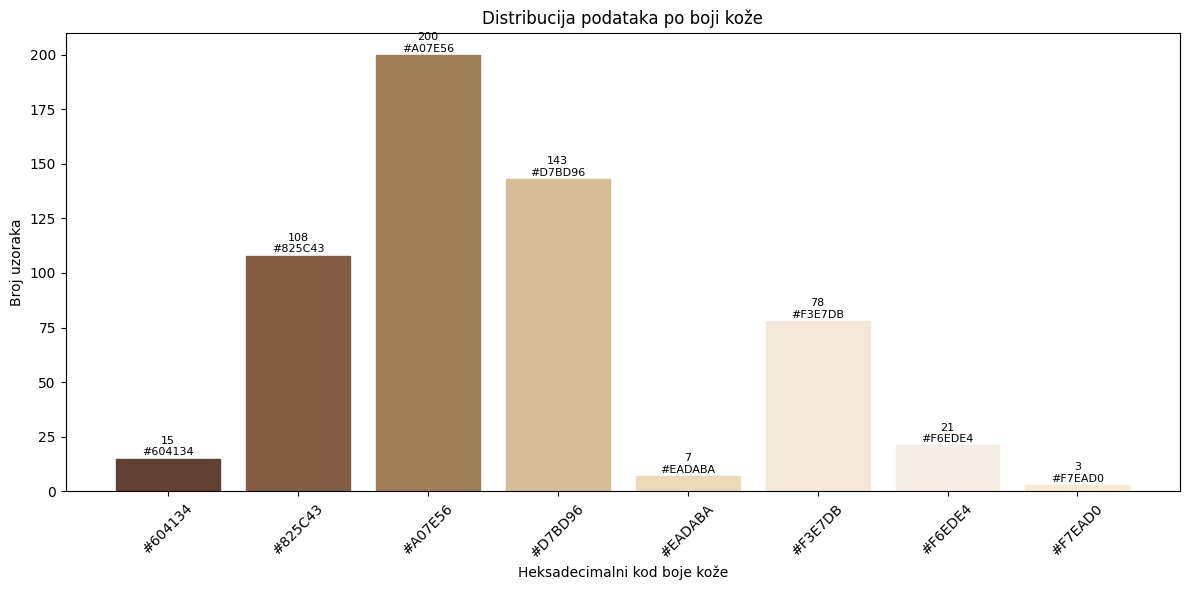

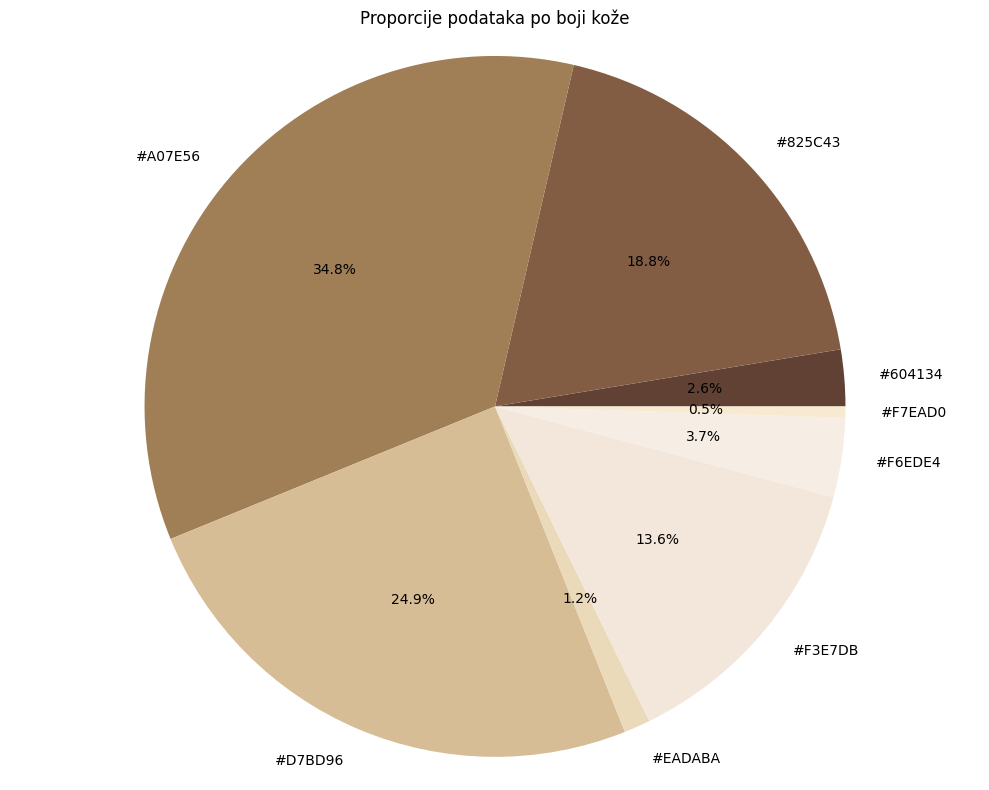

In [18]:
plot_skin_tone_distribution("../../ocisceni_podaci_sa_tonom_koze.csv")

In [4]:
    column_names = ['image_id', 'patient_id', 'gender', 'age', 'body_site', 
                   'diagnosis_confirmation_type', 'diagnosis', 'melanoma', 'skin_tone']
    df = pd.read_csv("../../ocisceni_podaci_sa_tonom_koze.csv", names=column_names)
    
    # Grupisanje podataka po vrednosti boje kože
    skin_tone_counts = df['skin_tone'].value_counts().sort_index()
    
    # Prikaz rezultata
    print("Broj uzoraka po boji kože:")
    print("==========================")
    
    for hex_color, count in skin_tone_counts.items():
        print(f"{hex_color}: {count} uzoraka")
    
    # Ukupan broj uzoraka
    print(f"\nUkupno: {len(df)} uzoraka")

Broj uzoraka po boji kože:
#3A312A: 6 uzoraka
#604134: 444 uzoraka
#825C43: 4399 uzoraka
#A07E56: 6575 uzoraka
#D7BD96: 6311 uzoraka
#EADABA: 521 uzoraka
#F3E7DB: 12003 uzoraka
#F6EDE4: 2106 uzoraka
#F7EAD0: 166 uzoraka
skin tone: 1 uzoraka

Ukupno: 32532 uzoraka


In [5]:
df.head()

,image_id,patient_id,gender,age,body_site,diagnosis_confirmation_type,diagnosis,melanoma,skin_tone
0,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target,skin tone
1,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0,#F3E7DB
2,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0,#D7BD96
3,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0,#604134
4,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0,#604134
